In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
# Load the financial transaction dataset
transaction_data = pd.read_csv("C:/Users/madin/Desktop/TASK2/financial_transaction_data.csv")

In [3]:
# Display the first 5 rows of the dataset
transaction_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraudulent
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Dataset information
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        199999 non-null  float64
 1   V1          199999 non-null  float64
 2   V2          199999 non-null  float64
 3   V3          199999 non-null  float64
 4   V4          199999 non-null  float64
 5   V5          199999 non-null  float64
 6   V6          199999 non-null  float64
 7   V7          199999 non-null  float64
 8   V8          199999 non-null  float64
 9   V9          199999 non-null  float64
 10  V10         199999 non-null  float64
 11  V11         199999 non-null  float64
 12  V12         199999 non-null  float64
 13  V13         199999 non-null  float64
 14  V14         199999 non-null  float64
 15  V15         199999 non-null  float64
 16  V16         199999 non-null  float64
 17  V17         199999 non-null  float64
 18  V18         199999 non-null  float64
 19  V1

In [5]:
# Check for missing values in each column
transaction_data.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Fraudulent    0
dtype: int64

In [6]:
# Explore the distribution of legitimate and fraudulent transactions
transaction_data['Fraudulent'].value_counts()

0    199614
1       385
Name: Fraudulent, dtype: int64

In [7]:
# Separate the data for analysis
legitimate = transaction_data[transaction_data.Fraudulent == 0]
fraudulent = transaction_data[transaction_data.Fraudulent == 1]

In [8]:
print(legitimate.shape)
print(fraudulent.shape)

(199614, 31)
(385, 31)


In [9]:
# Statistical measures of the data for legitimate transactions
legitimate.Amount.describe()

count    199614.000000
mean         89.706986
std         248.732038
min           0.000000
25%           5.990000
50%          23.000000
75%          79.190000
max       19656.530000
Name: Amount, dtype: float64

In [10]:
# Statistical measures of the data for fraudulent transactions
fraudulent.Amount.describe()

count     385.000000
mean      121.808805
std       256.061414
min         0.000000
25%         1.000000
50%        12.310000
75%       104.810000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# Compare the values for both types of transactions
transaction_data.groupby('Fraudulent').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Fraudulent,,,,,,,,,,,,,,,,,,,,,
0,70661.338629,-0.094060,-0.004916,0.332876,0.065404,-0.103028,0.048401,-0.037489,0.015333,0.014286,...,0.018688,-0.016251,-0.047323,-0.015355,0.004285,0.060363,0.006005,0.001292,0.001722,89.706986
1,61286.968831,-5.697855,4.197893,-7.727879,4.758152,-4.090343,-1.409713,-6.624255,0.684653,-2.761479,...,0.390145,0.791049,-0.022175,-0.054605,-0.070451,0.070767,0.036967,0.177042,0.057351,121.808805


# Create a subsample dataset that mirrors the distribution of regular and fraudulent transactions.

## Number of Fraudulent Transactions: 492 

In [12]:
legitimate_sample = legitimate.sample(n=492)

# Concatenate two Dataframes

In [13]:
balanced_dataset = pd.concat([legitimate_sample, fraudulent], axis=0)

In [14]:
balanced_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraudulent
2535,2098.0,-0.445649,0.462053,1.050359,-2.180048,0.231165,-0.758195,0.851403,-0.038639,0.886613,...,0.115612,0.610118,-0.254144,-0.033585,-0.100171,-0.820068,0.237875,-0.031779,1.00,0
123311,76880.0,0.985471,-0.034260,0.442119,1.375254,-0.244245,0.052990,0.058077,0.098685,-0.000555,...,0.002335,0.065717,-0.105851,0.250054,0.585122,-0.349836,0.024828,0.019079,71.62,0
122902,76736.0,-1.876296,1.464179,-0.391039,-0.053657,0.194824,0.389521,-0.274214,1.443834,-1.222272,...,0.406475,0.853111,0.141538,-0.573763,-0.584592,0.499296,-0.458055,-0.130239,1.00,0
128228,78641.0,-1.021325,0.488249,1.517893,-1.677494,-0.428086,-0.480524,-0.011171,0.401551,-1.605317,...,0.148188,0.264412,-0.253941,0.119922,0.535924,-0.313361,-0.080105,-0.025627,11.95,0
49911,44263.0,0.652443,-1.642181,1.417921,-0.494876,-1.225030,2.487110,-1.631113,1.061594,2.901805,...,0.340124,1.359523,-0.197490,-0.959563,0.265456,-0.287089,0.183371,0.035786,146.21,0


In [15]:
balanced_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraudulent
192687,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
198868,132688.0,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1


In [16]:
balanced_dataset['Fraudulent'].value_counts()

0    492
1    385
Name: Fraudulent, dtype: int64

In [17]:
balanced_dataset.groupby('Fraudulent').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Fraudulent,,,,,,,,,,,,,,,,,,,,,
0,69354.601626,-0.022870,0.034631,0.294509,0.078043,-0.097687,0.076999,-0.096227,0.091290,0.075903,...,0.046293,-0.007609,-0.041223,-0.062541,-0.019993,0.065983,0.013934,0.014720,0.006661,89.446077
1,61286.968831,-5.697855,4.197893,-7.727879,4.758152,-4.090343,-1.409713,-6.624255,0.684653,-2.761479,...,0.390145,0.791049,-0.022175,-0.054605,-0.070451,0.070767,0.036967,0.177042,0.057351,121.808805


### Segmenting the Dataset into Features and Labels. 

In [18]:
X = balanced_dataset.drop(columns='Fraudulent', axis=1)
y = balanced_dataset['Fraudulent']

In [19]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
2535      2098.0 -0.445649  0.462053  1.050359 -2.180048  0.231165 -0.758195   
123311   76880.0  0.985471 -0.034260  0.442119  1.375254 -0.244245  0.052990   
122902   76736.0 -1.876296  1.464179 -0.391039 -0.053657  0.194824  0.389521   
128228   78641.0 -1.021325  0.488249  1.517893 -1.677494 -0.428086 -0.480524   
49911    44263.0  0.652443 -1.642181  1.417921 -0.494876 -1.225030  2.487110   
...          ...       ...       ...       ...       ...       ...       ...   
192687  129808.0  1.522080 -0.519429 -2.581685  0.774741  0.206722 -1.431020   
195383  131024.0  0.469750 -1.237555 -1.767341  4.833490 -0.268715 -0.512760   
197586  132086.0 -0.361428  1.133472 -2.971360 -0.283073  0.371452 -0.574680   
198868  132688.0  0.432554  1.861373 -4.310353  2.448080  4.574094 -2.979912   
199896  133184.0 -1.212682 -2.484824 -6.397186  3.670562 -0.863375 -1.855855   

              V7        V8        V9  .

In [20]:
print(y)

2535      0
123311    0
122902    0
128228    0
49911     0
         ..
192687    1
195383    1
197586    1
198868    1
199896    1
Name: Fraudulent, Length: 877, dtype: int64


### Separate the dataset into training and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(877, 30) (701, 30) (176, 30)


#### Model Training

#### Random Forest Classifier


In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
# Train the Random Forest Model with Training Data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

### Metrics: Accuracy, Precision, Recall, F1 Score

In [25]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, y_train)

In [26]:
print('Accuracy on Training data: ', training_accuracy)

Accuracy on Training data:  1.0


In [27]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, y_test)

In [28]:
print('Accuracy score on Test Data: ', test_accuracy)

Accuracy score on Test Data:  0.9318181818181818


# Additional metrics:
## precision, Recall, F1 Score

In [29]:
precision = precision_score(X_test_prediction, y_test)

In [30]:
print('Precision:', precision)

Precision: 0.8571428571428571


In [31]:
recall = recall_score(X_test_prediction, y_test)

In [32]:
print('Recall:', recall)

Recall: 0.9850746268656716


In [33]:
f1 = f1_score(X_test_prediction, y_test)

In [34]:
print('F1 Score:', f1)

F1 Score: 0.9166666666666667


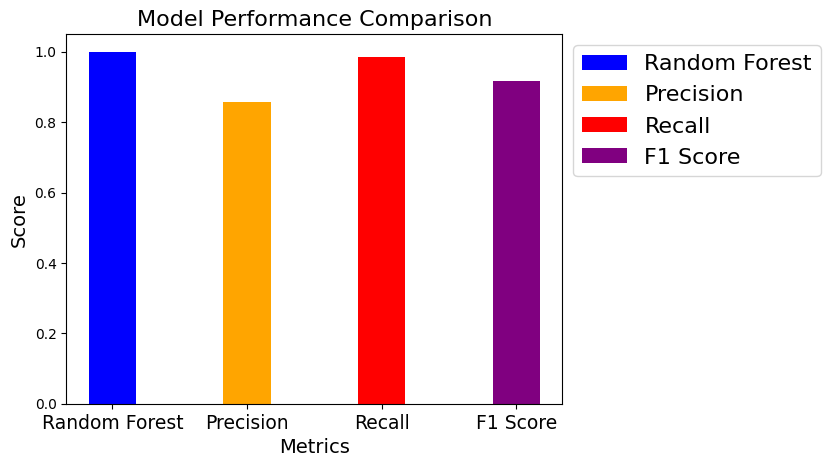

In [35]:
labels = ['Random Forest', 'Precision', 'Recall', 'F1 Score']
values = [training_accuracy, precision, recall, f1]

bar_positions = np.arange(len(labels))  # Bar positions on the x-axis
bar_width = 0.35  # Width of the bars

plt.bar(bar_positions, values, color=['blue', 'orange', 'red', 'purple'], width=bar_width, label=['Random Forest', 'Precision', 'Recall', 'F1 Score'])
plt.title('Model Performance Comparison',fontsize=16)
plt.xlabel('Metrics',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.xticks(bar_positions, labels, fontsize=13.5)  # Set x-axis labels
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=16)  # Place legend outside the graph
plt.show()